<a href="https://colab.research.google.com/github/ChristianConchari/Computer-Vision-Notes/blob/master/Tutorial_7_Fourier_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial 7: Fourier Transforms

The frequency components of an image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum.

In fact, an FT treats patterns of intensity in an image as sine waves with a particular frequency, and you can look at an interesting visualization of these sine wave components [on this page](https://plus.maths.org/content/fourier-transforms-images).

In this tutorial, we'll first look at a few simple image patterns to build up an idea of what image frequency components look like, and then transform a more complex image to see what it looks like in the frequency domain.

## 1. Load and display two images

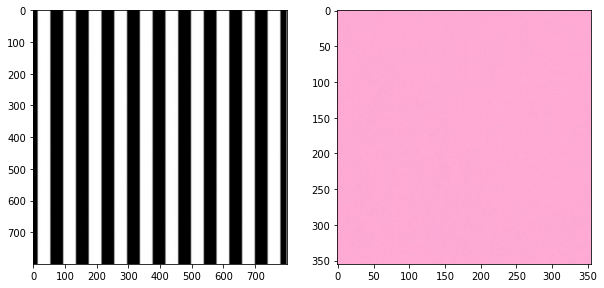

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the images
image_stripes = cv2.imread('stripes.jpeg')
# Change color to RGB (from BGR)
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

# Read in the images
image_solid = cv2.imread('pink_solid.jpeg')
# Change color to RGB (from BGR)
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(image_stripes)
ax2.imshow(image_solid)

## 2. Convert the images to grayscale

In [ ]:
# convert to grayscale to focus on the intensity patterns in the image
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)

# normalize the image color values from a range of [0,255] to [0,1] for further processing
norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0

# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    # Brings the center to the middle
    fshift = np.fft.fftshift(f)
    # scale magnitude values
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    
    return magnitude_spectrum


## 3. Apply Fourier Transform

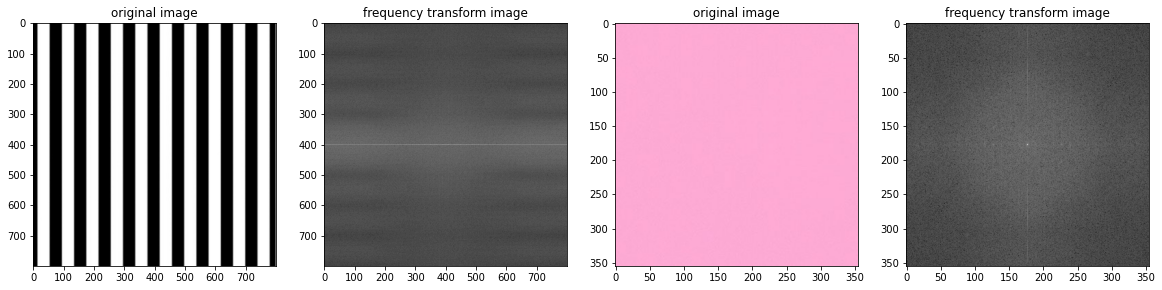

In [ ]:
# Call the function on the normalized images
# and display the transforms
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

# display the images
# original images to the left of their frequency transform
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original image')
ax1.imshow(image_stripes)
ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title('original image')
ax3.imshow(image_solid)
ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap='gray')


Low frequencies are at the center of the frequency transform image. 

The transform images for these example show that the solid image has most low-frequency components (as seen by the center bright spot). 

The stripes tranform image contains low-frequencies for the areas of white and black color and high frequencies for the edges in between those colors. The stripes transform image also tells us that there is one dominating direction for these frequencies; vertical stripes are represented by a horizontal line passing through the center of the frequency transform image.

## 4. 2D DFT for a real-world image

Text(0.5, 1.0, 'Magnitude spectrum')

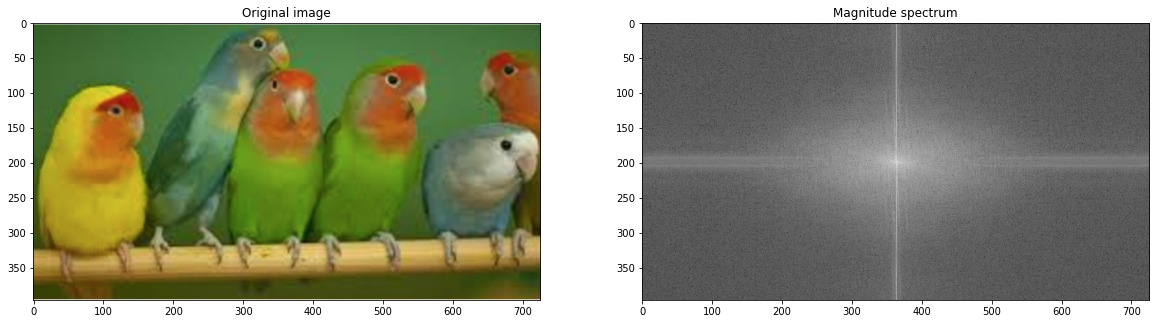

In [ ]:
# Read in an image
image = cv2.imread('birds.jpeg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# normalize the image
norm_image = gray/255.0

f_image = ft_image(norm_image)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax1.set_title('Original image')
ax2.imshow(f_image, cmap='gray')
ax2.set_title('Magnitude spectrum')

Notice that this image has components of all frequencies. You can see a bright spot in the center of the transform image, which tells us that a large portion of the image is low-frequency; this makes sense since the body of the birds and background are solid colors. The transform image also tells us that there are **two** dominating directions for these frequencies; vertical edges (from the edges of birds) are represented by a horizontal line passing through the center of the frequency transform image, and horizontal edges (from the branch and tops of the birds' heads) are represented by a vertical line passing through the center.

## 5. Filter and restore an image from the frequency domain

Since we already have a couple of images in the frequency domain, we can do some operations like high-pass or low-pass filtering. Then, we will have to implement inverse DFT to reconstruct the image. 



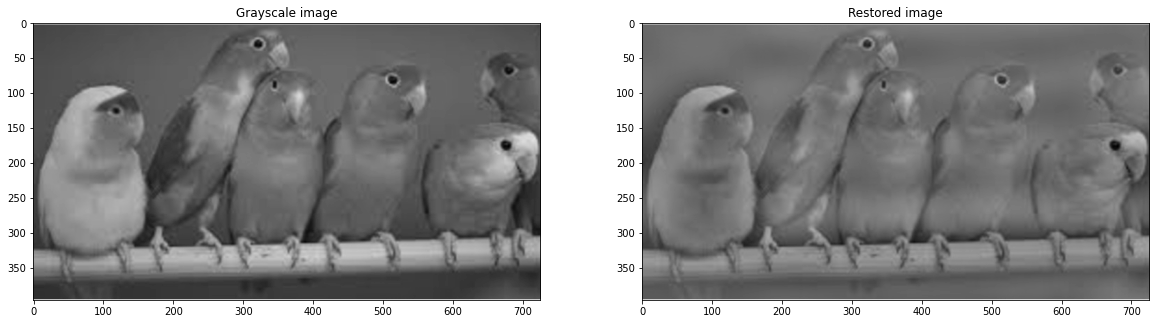

In [ ]:
# Apply FT to the image
f = np.fft.fft2(norm_image)
# Move the center to the middle
fshift_mask = np.fft.fftshift(f)

rows, cols = norm_image.shape
# find the center 
crow, ccol = rows//2 , cols//2

# removes low-frequency components of an image (positioned in the center)
fshift_mask[crow-4:crow+5, ccol-4:ccol+5] = 0

# inverse fftshift brings the center to the original position
f_ishift = np.fft.ifftshift(fshift_mask)
# ifft2 converts the image from frequency domain to space domain 
img_back = np.fft.ifft2(f_ishift)
# select the real component
img_back = np.real(img_back)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(gray, cmap='gray')
ax1.set_title('Grayscale image')
ax2.imshow(img_back, cmap='gray')
ax2.set_title('Restored image')

plt.show()

### Exercise 1: 
Load an image and implement Fourier Transform. Then, remove high frequency components (noise) and restore the image.  

## Solution:
As we knwon, when working with an image in the frequency domain, the low-frequency components will be in the centre and the high-frequency components on the outside.

Therefore, to filter the high-frequency components we will have to remove the outside-centre frequency components.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.util import random_noise

%matplotlib inline

# Read in an image
image = cv2.imread('car.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# normalize the image
norm_image = gray/255.0

In [ ]:
# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    # Brings the center to the middle
    fshift = np.fft.fftshift(f)
    # scale magnitude values
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    
    return magnitude_spectrum

Text(0.5, 1.0, 'Magnitude spectrum with Gaussian noise')

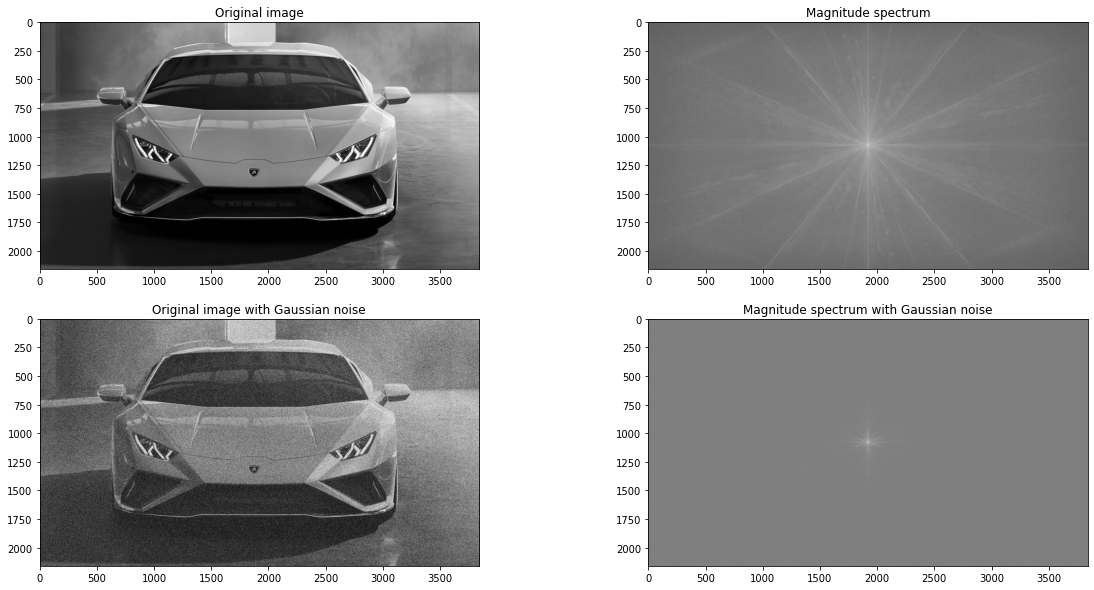

In [ ]:
#Add noise to the image
noise_img = random_noise(gray, mode='gaussian',var=0.15)
norm_noise_image = noise_img/255.0 


f_image_noise = ft_image(norm_noise_image)
f_image = ft_image(norm_image)

# Display the images
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(20,10))

ax1.imshow(gray, cmap='gray')
ax1.set_title('Original image')
ax2.imshow(f_image, cmap='gray')
ax2.set_title('Magnitude spectrum')
ax3.imshow(noise_img, cmap='gray')
ax3.set_title('Original image with Gaussian noise')
ax4.imshow(f_image_noise, cmap='gray')
ax4.set_title('Magnitude spectrum with Gaussian noise')

As mentioned before, to preserve the low-frequency components we will have to define a mask that preserves a central pixel radius, and at the same time discards the high-frequency components, that is, those that are outside the mask.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


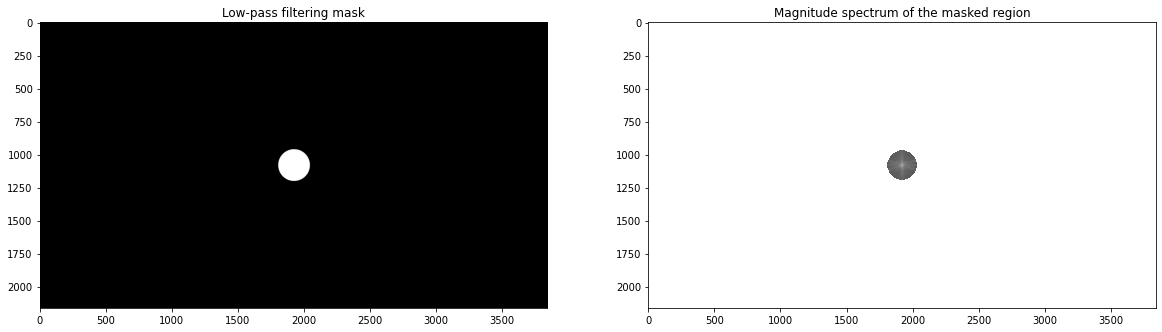

In [ ]:
# Apply FT to the image
f = np.fft.fft2(norm_noise_image)

# Move the center to the middle
fshift_mask = np.fft.fftshift(f)


rows, cols = norm_image.shape
# find the center 
crow, ccol = rows//2 , cols//2


# define a mask for low-pass filter
mask = np.zeros((rows,cols), np.uint8)
r = 120

x,y = np.ogrid[:rows,:cols]
mask_area = (x - crow)**2 + (y - ccol)**2 <= r**2
mask[mask_area] = 1


f_shift = fshift_mask*mask
magnitude_spectrum_filtered = 20*np.log(np.abs(f_shift))


f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(mask, cmap='gray')
ax1.set_title('Low-pass filtering mask')
ax2.imshow(magnitude_spectrum_filtered, cmap='gray')
ax2.set_title('Magnitude spectrum of the masked region')



plt.show()

Remove the high-frequency components by multiplying the mask with the fft the image. In this way, the values of the image corresponding to the mask will be multiplied by 1, and the values that are outside the mask will be multiplied by 0.

The next step will be to obtain the inverse transform of the image.

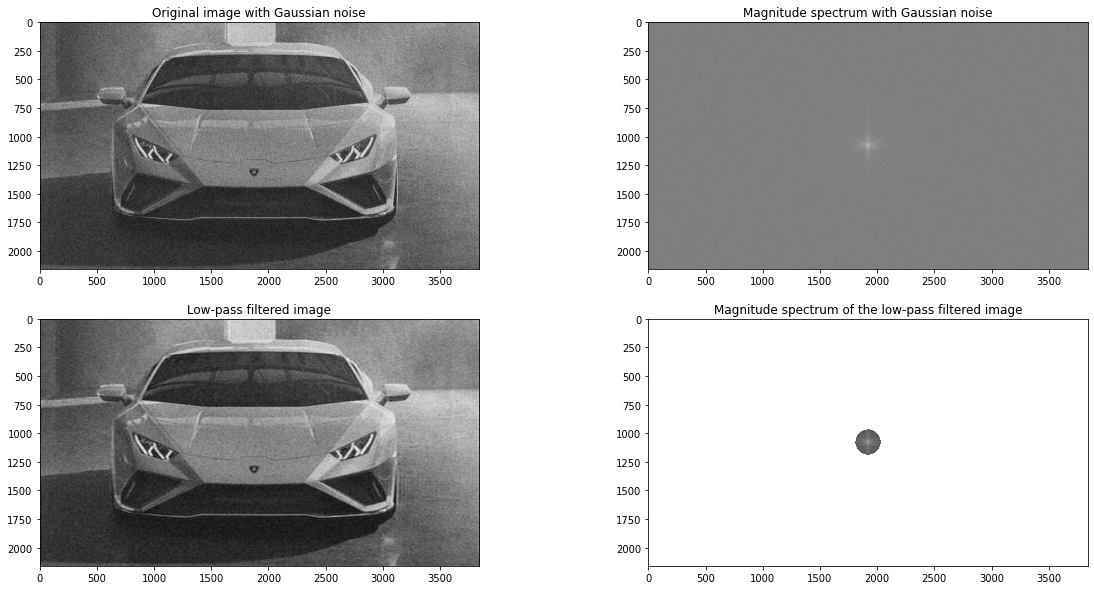

In [ ]:
# shift the image from the center
f_ishift = np.fft.ifftshift(f_shift)
# convert the image from frequency domain to space domain 
img_back = np.fft.ifft2(f_ishift)
# select the real component
img_back = np.real(img_back)


# Display the images
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(20,10))

ax1.imshow(noise_img, cmap='gray')
ax1.set_title('Original image with Gaussian noise')
ax2.imshow(f_image_noise, cmap='gray')
ax2.set_title('Magnitude spectrum with Gaussian noise')
ax3.imshow(img_back, cmap='gray')
ax3.set_title('Low-pass filtered image')
ax4.imshow(magnitude_spectrum_filtered , cmap='gray')
ax4.set_title('Magnitude spectrum of the low-pass filtered image')


plt.show()

## 6. High and Low Pass Filters under Fourier Transformation

Let's remember high and low pass filters! Probably you wondered, what makes filters high and low-pass; why is a Sobel filter high-pass and a Gaussian filter low-pass?

Well, you can actually visualize the frequencies that these filters block out by taking a look at their fourier transforms. The frequency components of any image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum. So, let's treat our filters as small images, and display them in the frequency domain.

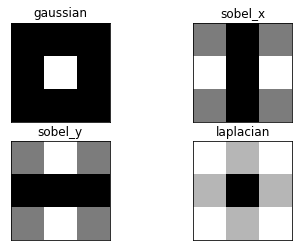

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

Areas of white or light gray, allow that part of the frequency spectrum through! Areas of black mean that part of the spectrum is blocked out of the image. 

Recall that the low frequencies in the frequency spectrum are at the center of the frequency transform image, and high frequencies are at the edges. You should see that the Gaussian filter allows only low-pass frequencies through, which is the center of the frequency transformed image. The sobel filters block out frequencies of a certain orientation and a laplace (all edge, regardless of orientation) filter, should block out low-frequencies!

### Exercise 2: 

Now, load in an image, and filter it using a kernel of your choice. Then, apply a fourier transform to the original *and* filtered images and compare them.

## SOLUTION:

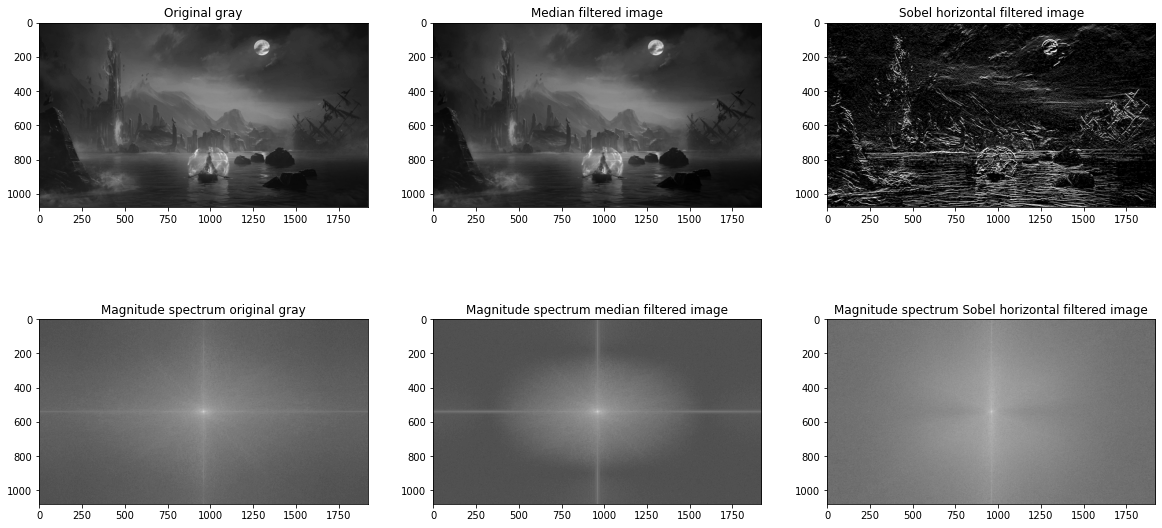

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
image = cv2.imread('landscape.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define mean filter
gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

# Define Sobel horizontal filter
sobel_x = np.array([[ -10, -20, -10], 
                   [ 0, 0, 0], 
                   [ 10, 20, 10]])



filtered_image1 = cv2.filter2D(gray, -1, gaussian)
filtered_image2 = cv2.filter2D(gray, -1, sobel_x)



f1=ft_image(gray)
f2=ft_image(filtered_image1)
f3=ft_image(filtered_image2)



# shows the results
f, ((ax1, ax3, ax5), (ax2, ax4, ax6)) = plt.subplots(2 , 3, figsize=(20,10))

ax1.set_title('Original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('Magnitude spectrum original gray')
ax2.imshow(f1, cmap='gray')

ax3.set_title('Median filtered image')
ax3.imshow(filtered_image1, cmap='gray')

ax4.set_title('Magnitude spectrum median filtered image')
ax4.imshow(f2, cmap='gray')

ax5.set_title('Sobel horizontal filtered image')
ax5.imshow(filtered_image2, cmap='gray')

ax6.set_title('Magnitude spectrum Sobel horizontal filtered image')
ax6.imshow(f3, cmap='gray')

For the median filtered image magnitud spectrum, looking at the image we notice that the central part remains the same as the original image, on the other hand, the external part of the image in the frequency domain was quite darkened, interpreting this darkening as a reduction in intensity. That is, the low-frequency components were maintained, while the high-frequency components were attenuated, just as a low-pass filter must act. Something important to note is that both the horizontal and vertical lines of the frequency spectrum of the original image were maintained, this means that if the image was smoothed by the application of low-pass filtering, the information on the edges was not lost.

On the other hand, viewing the frequency spectrum of the filtered image with the horizontal Sobel. First, we will notice that the horizontal line that can be seen in the frequency spectrum of the unfiltered image is gone, but the vertical line remains. This is because the vertical line corresponds to the horizontal contours of the original image, and the horizontal line corresponds to similar contours, and as we know, the Sobel Horizontal filter will only keep the horizontal contours. It should also be noted that components away from the center were not attenuated. We can understand that by keeping only the vertical line in the frequency image, we are applying a high pass filter that especially keeps the horizontal contours.


### Exercise 3

Implement the previous exercise uniquely with OpenCV.

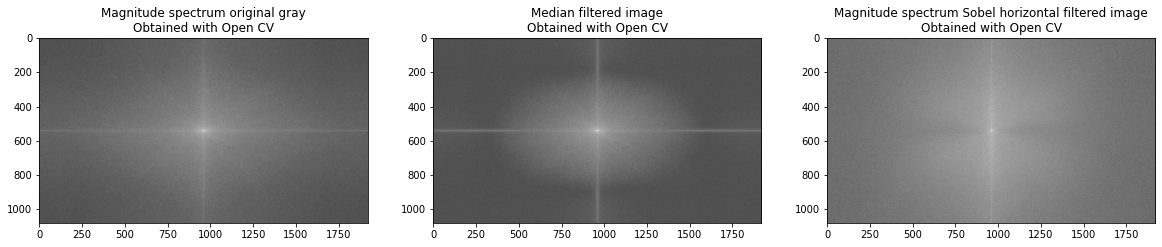

In [ ]:
import matplotlib.pyplot as plt
import cv2

def dft_image(image):
  dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  m_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
  return m_spectrum

cv2_1 = dft_image(gray)
cv2_2 = dft_image(filtered_image1)
cv2_3 = dft_image(filtered_image2)

f, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.imshow(cv2_1, cmap='gray')
ax1.set_title('Magnitude spectrum original gray\nObtained with Open CV')
ax2.imshow(cv2_2, cmap='gray')
ax2.set_title('Median filtered image\nObtained with Open CV')
ax3.imshow(cv2_3, cmap='gray')
ax3.set_title('Magnitude spectrum Sobel horizontal filtered image\nObtained with Open CV')

plt.show()

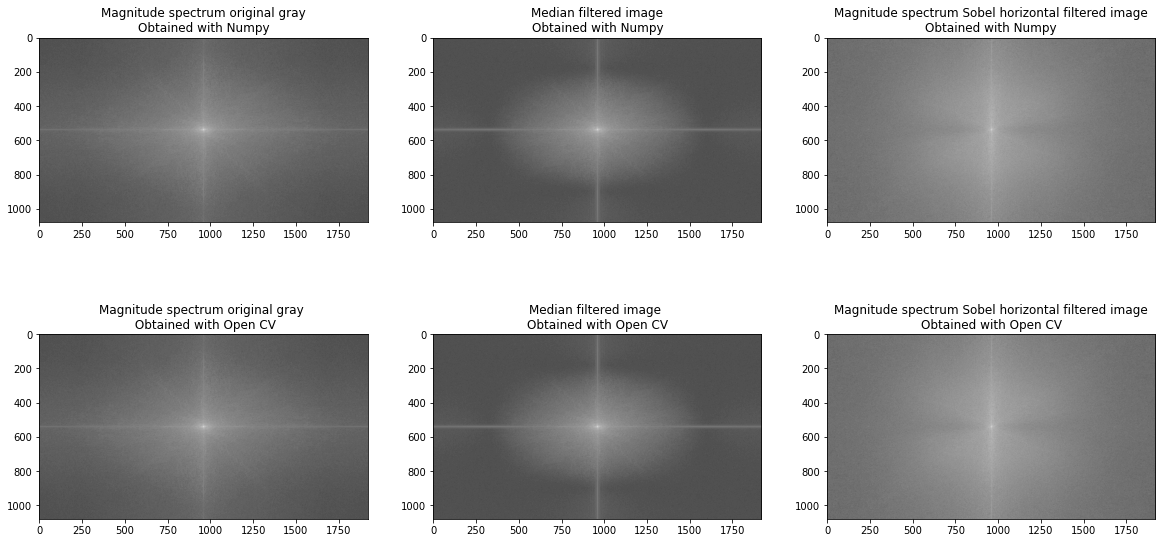

In [ ]:
f, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(20,10))

ax1.imshow(f1, cmap='gray')
ax1.set_title('Magnitude spectrum original gray\nObtained with Numpy')
ax2.imshow(f2, cmap='gray')
ax2.set_title('Median filtered image\nObtained with Numpy')
ax3.imshow(f3, cmap='gray')
ax3.set_title('Magnitude spectrum Sobel horizontal filtered image\nObtained with Numpy')
ax4.imshow(cv2_1, cmap='gray')
ax4.set_title('Magnitude spectrum original gray \n Obtained with Open CV')
ax5.imshow(cv2_2, cmap='gray')
ax5.set_title('Median filtered image \nObtained with Open CV')
ax6.imshow(cv2_3, cmap='gray')
ax6.set_title('Magnitude spectrum Sobel horizontal filtered image\nObtained with Open CV')

plt.show()

We can notice that in the frequency spectrum obtained with the OpenCV library the intensity of gray is darker than in the images obtained with numpy. We can also mention that although the functions of the numpy library are simpler, they have fewer parameters than the functions of the OpenCV library, so in a deeper approach the latter could be more useful.

### Useful links

- https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm
- https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#additional-resources
- https://plus.maths.org/content/fourier-transforms-images